In [5]:
# Step 1: 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 2: 데이터 로드
DataCarRent = pd.read_csv('/apps/study_machinelearnings/datasets/LetalCarOfContractType.csv')

In [6]:
# Step 3: 연속형 변수 확인 및 결측치 체크
continuous_cols = ['overdue_count', 'amount', 'age', 'Mileage']
print("초기 결측치 현황:")
print(DataCarRent[continuous_cols].isna().sum())

# Step 4: 결측치가 없는 데이터와 있는 데이터 분리
train_data = DataCarRent.dropna()
missing_data = DataCarRent[DataCarRent[continuous_cols].isna().any(axis=1)]

초기 결측치 현황:
overdue_count        0
amount               0
age              10795
Mileage          10795
dtype: int64


In [7]:
# Step 5: 각 변수별 다중 선형 회귀 모델 생성 및 결측치 예측
def predict_missing_values(data, target_col):
    # 결측치가 있는 행 찾기
    missing_mask = data[target_col].isna()
    
    if not missing_mask.any():
        return
    
    # 사용 가능한 특성 선택 (target 제외, 결측치 없는 열만)
    features = [col for col in continuous_cols if col != target_col]
    valid_features = []
    for feature in features:
        # 결측치가 있는 행들에서 해당 특성의 결측치 확인
        if not data.loc[missing_mask, feature].isna().any():
            valid_features.append(feature)
    
    if not valid_features:
        print(f"{target_col}의 결측치를 예측할 수 있는 유효한 특성이 없습니다.")
        return
    
    # 모델 학습
    model = LinearRegression()
    model.fit(train_data[valid_features], train_data[target_col])
    
    # 결측치 예측
    predictions = model.predict(data.loc[missing_mask, valid_features])
    data.loc[missing_mask, target_col] = predictions
    
    print(f"{target_col} 예측 완료 (사용된 특성: {valid_features})")
    print(f"R2 Score: {model.score(train_data[valid_features], train_data[target_col]):.4f}")

In [8]:
# Step 6: 각 변수의 결측치 예측
for col in continuous_cols:
    predict_missing_values(DataCarRent, col)

# Step 7: 결과 시각화
def plot_results(original_data, filled_data, missing_idx):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    # 변수 쌍 정의
    pairs = [
        ('age', 'Mileage'),
        ('amount', 'Mileage'),
        ('overdue_count', 'Mileage'),
        ('age', 'amount'),
        ('age', 'overdue_count'),
        ('amount', 'overdue_count')
    ]
    
    for idx, (x, y) in enumerate(pairs):
        if idx < len(axes):
            # 원본 데이터 플롯
            axes[idx].scatter(original_data[x], original_data[y], 
                            alpha=0.5, label='원본 데이터')
            
            # 예측된 데이터 플롯
            axes[idx].scatter(filled_data.loc[missing_idx, x],
                            filled_data.loc[missing_idx, y],
                            color='red', alpha=0.5, label='예측 데이터')
            
            axes[idx].set_xlabel(x)
            axes[idx].set_ylabel(y)
            axes[idx].legend()
            axes[idx].set_title(f'{x} vs {y}')
    
    plt.tight_layout()
    plt.show()

age 예측 완료 (사용된 특성: ['overdue_count', 'amount'])
R2 Score: 0.0000
Mileage 예측 완료 (사용된 특성: ['overdue_count', 'amount', 'age'])
R2 Score: 0.9473


/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_40815/2592221794.py:36: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
/root/.local/lib/python3.8/site-pack

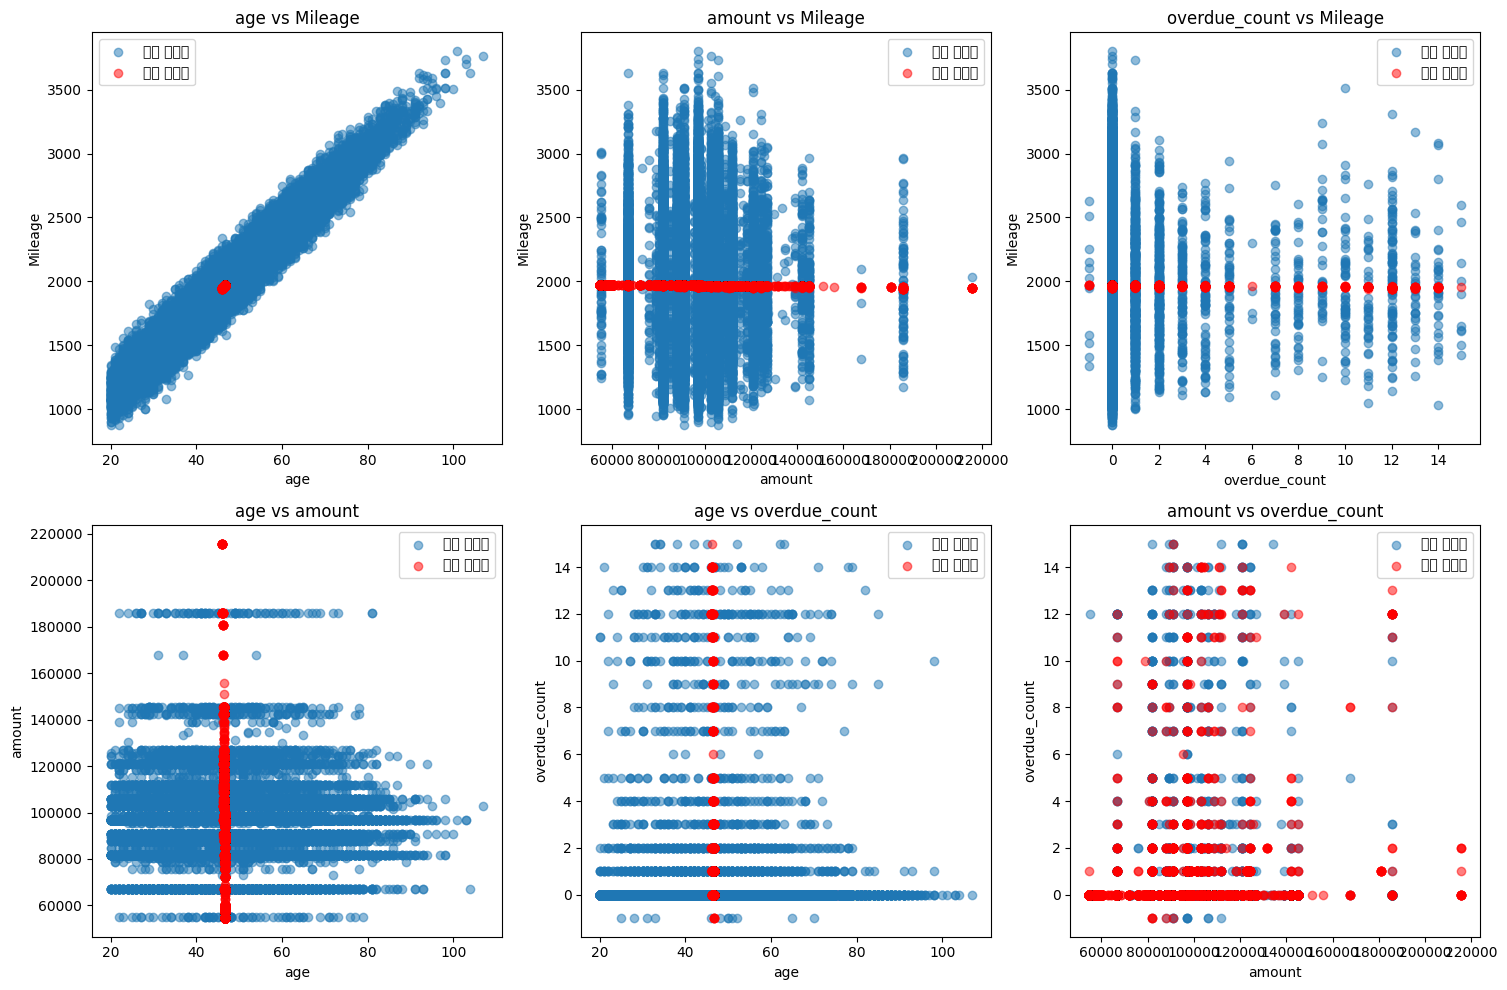


최종 결측치 현황:
overdue_count    0
amount           0
age              0
Mileage          0
dtype: int64

채워진 데이터 기술 통계:
       overdue_count         amount           age       Mileage
count   51304.000000   51304.000000  51304.000000  51304.000000
mean        0.161040   93994.980021     46.612372   1968.057167
std         1.122356   15305.147334     11.965756    388.055521
min        -1.000000   54603.000000     20.000000    872.000000
25%         0.000000   81900.000000     39.000000   1733.000000
50%         0.000000   96900.000000     46.605846   1967.831124
75%         0.000000   98400.000000     53.000000   2171.000000
max        15.000000  215700.000000    107.000000   3803.000000

변수간 상관관계:
               overdue_count    amount       age   Mileage
overdue_count       1.000000  0.075492 -0.002216 -0.003304
amount              0.075492  1.000000 -0.005136 -0.005913
age                -0.002216 -0.005136  1.000000  0.973281
Mileage            -0.003304 -0.005913  0.973281  1.000000


In [9]:
# 결과 시각화 실행
plot_results(train_data, DataCarRent, missing_data.index)

# Step 8: 최종 결과 확인
print("\n최종 결측치 현황:")
print(DataCarRent[continuous_cols].isna().sum())

print("\n채워진 데이터 기술 통계:")
print(DataCarRent[continuous_cols].describe())

print("\n변수간 상관관계:")
print(DataCarRent[continuous_cols].corr())